<h1><center>The Spark Foundation</center></h1>

<h1><center>GRIP Nov 2020</center></h1>

### Name: Srishti Hedaoo

### Task 6 : Prediction using Decision Tree Classifier

#### The task is to create a decision tree classifier and visualize it graphically
The purpose is if we feed any new data to this classifier, then it would be able to predict the right class accordingly

#### Steps to create a decision tree classifier
* Step1  - Importing all necessary libraries
* Step2  - Function to import the Iris dataset
* Step3  - Function to check summary of the dataset
* Step4  - Function to visualize the dataset and detect the outliers
* Step5  - Function to remove outliers present in the dataset 
* Step6  - Function to split data into train and test set
* Step7  - Function to fit the dataset into Decision Tree Classifier
* Step8  - Predict the test set using fitted model
* Step9  - Checking the accuracy of both the classifiers
* Step10 - Plot the decision tree for both the classifiers
* Step11 - Feed the new dataset and predict right classes

### Step 1 : Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2 :Function to Import the dataset

In [2]:
dataset = "Iris (1).csv"

In [3]:
def importing(dataset):
    data = pd.read_csv(dataset)
    data.drop(["Id"],axis = 1,inplace = True)
    return data
importing(dataset)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Step 3 : Function to check the summary of the dataset

In [4]:
def summary(dataset):
    data = importing(dataset)
    print(data.info())
    print()
    print(data.describe())
summary(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.9000

### Step 4 : Function to visualize the dataset and detect outliers

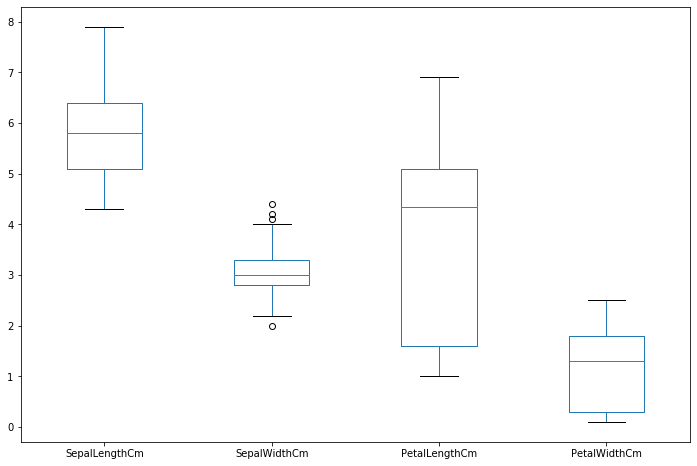

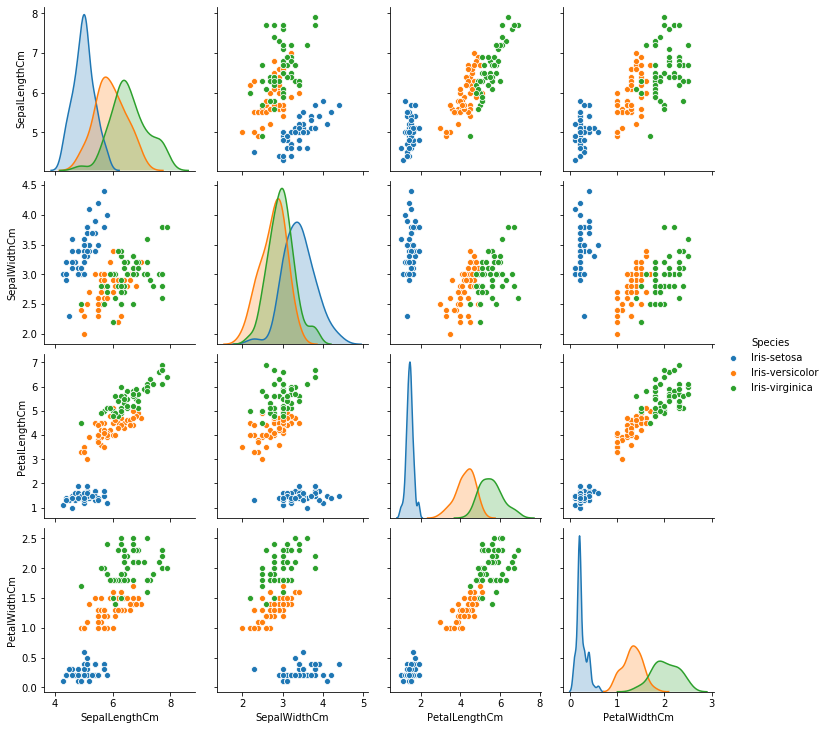

In [5]:
def visualize(dataset):
    data = importing(dataset)
    plt.figure(figsize = (12,8))
    data.boxplot(grid = False)
    sns.pairplot(data,hue = 'Species')
visualize(dataset)

Outliers are present in SepalWidthCm column, better to remove outliers and then fit the model

### Step 5: Function to remove outliers

In [6]:
def remove_outliers(dataset):
    data = importing(dataset)
    
    q1 = data["SepalWidthCm"].quantile(0.25)
    q3 = data["SepalWidthCm"].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data = data.loc[(data["SepalWidthCm"] > fence_low) & (data["SepalWidthCm"] < fence_high)]
    return data
remove_outliers(dataset)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Step 6: Function to split the dataset into training and test set

In [7]:
def split(dataset):
    data = remove_outliers(dataset)
    
    # Splitting the dataset into regressors and response variable
    X = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values
    
    # Splitting X and y into train and test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    return X_train, X_test, y_train, y_test

### Step 7: Fitting the dataset into Decision Tree Classifier

In [8]:
X_train, X_test, y_train, y_test = split(dataset)
def model_fit(X_train,y_train):
    from sklearn import tree
    classifier1 = tree.DecisionTreeClassifier(criterion = 'gini')
    classifier2 = tree.DecisionTreeClassifier(criterion = 'entropy')
    
    # For gini criterion
    model1 = classifier1.fit(X_train,y_train)
    
    # For Entropy criterion
    model2 = classifier2.fit(X_train, y_train)
    
    return model1, model2
model_fit(X_train,y_train)

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

### Step 8: Predict the test set using fitted model

In [9]:
def model_pred(X_test,y_test):
    model1, model2 = model_fit(X_train,y_train)
    
    y_pred_gini = model1.predict(X_test)
    
    y_pred_entropy = model2.predict(X_test)
    
    return y_pred_gini, y_pred_entropy

### Step 9: Checking the accuracy of both the classifiers 

In [10]:
def metrics(X_test, y_test):
    y_pred_gini, y_pred_entropy = model_pred(X_test,y_test)
    
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("For gini criterion")
    print()
    print("The classification report : \n" ,classification_report(y_test,y_pred_gini))
    print()
    print("For entropy criterion")
    print()
    print("The classification report : \n", classification_report(y_test,y_pred_entropy))
    print()
    print("For gini criterion")
    print()
    print("The confusion matrix : \n", confusion_matrix(y_test,y_pred_gini))
    print()
    print("For entropy criterion")
    print()
    print("The confusion matrix : \n", confusion_matrix(y_test,y_pred_entropy))
    print()
    print("For gini criterion")
    print()
    print("Accuracy : \n" ,accuracy_score(y_test,y_pred_gini))
    print()
    print("For entropy criterion")
    print()
    print("Accuracy : \n", accuracy_score(y_test,y_pred_entropy))
    print()
metrics(X_test,y_test)

For gini criterion

The classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        44
      macro avg       0.95      0.95      0.95        44
   weighted avg       0.95      0.95      0.95        44


For entropy criterion

The classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        44
      macro avg       0.97      0.98      0.98        44
   weighted avg       0.98      0.98      0.98        44


For gini criterion

The confusion matrix : 
 [[16  0  0]
 [ 0 15  1]
 [ 0  1 11]]

For entr

### We get 97.7% accuracy for both criterion

### Step 10: Plot the decision tree for both criterion

Gini criterion


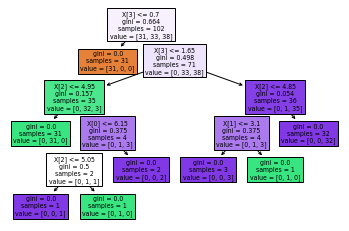

Entropy criterion


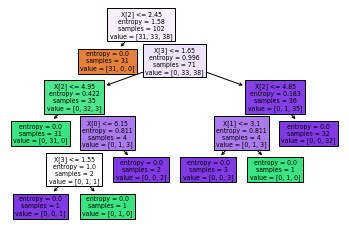

In [11]:
def tree_plot(dataset):
    model1, model2 = model_fit(X_train, y_train)
    
    from sklearn import tree 
    print("Gini criterion")
    tree.plot_tree(model1,filled=True)
    plt.show()
    print("Entropy criterion")
    tree.plot_tree(model2, filled = True)
    plt.show()
tree_plot(dataset)

### Step 11: Feed the new dataset and predict right classes

In [12]:
def feed_new_dataset(dataset_final):
    data_final = remove_outliers(dataset_final)
    X_test_final = data_final.iloc[:,:-1].values
    y_test_final = data_final.iloc[:,-1].values
    y_pred_gini, y_pred_entropy = model_pred(X_test_final,y_test_final)
    return pd.DataFrame(y_pred_gini, y_pred_entropy)

In [13]:
dataset_final = "Iris (1).csv"
feed_new_dataset(dataset_final)

,0
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
...,...
Iris-virginica,Iris-virginica
Iris-virginica,Iris-virginica
Iris-virginica,Iris-virginica
Iris-virginica,Iris-virginica
